# 28.03.2025

## Summary

So far, I've trained one separate model per each category in the MVTecAD dataset. Each of the models uses Patchcore to detect anomalies. All models are saved as .ckpt files in the models/ directory (not visible here because of gitignore). When I train a new model (patchcore_test.py) I update the corresponding .ckpt file (as of now I do it manually). These saved models can then be tested and used to make predictions on some images (patchcore_train.py). To help me visualize things I wrote some auxiliary functions (my_lib.py).

## Example - bottle

Example: testing a saved model for the bottle category.

In [1]:
import sys
sys.path.insert(1, './src')

In [2]:
from src.patchcore_test import test_on_category

<frozen importlib.util>:207: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
c:\Users\kocha\anaconda3\envs\dmml\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:
test_on_category("bottle", 0)
# Technical detail: some models have been trained on wide_resnet50_2 backbone and some on resnet18 backbone.
# 0 - wide_resnet50_2
# 1 - resnet18
# The backbone should match the model, otherwise there'll be an error while reading a .ckpt file.

INFO:anomalib.models.components.base.anomalib_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:anomalib.data.datamodules.image.mvtecad:Found the dataset.
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at C:\Users\kocha\Desktop\Studies\AI Workshop 1\models\bottle\model.ckpt
c:\Users\kocha\anaconda3\envs\

Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 42.25850796699524 seconds
Throughput (batch_size=16) : 1.964101526367772 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │    0.9919999837875366     │
│        pixel_AUROC        │    0.9815165996551514     │
│       pixel_F1Score       │    0.7306636571884155     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 1.0,
  'image_F1Score': 0.9919999837875366,
  'pixel_AUROC': 0.9815165996551514,
  'pixel_F1Score': 0.7306636571884155}]

Example: using a saved model to make a prediction on some images.

In [4]:
from src.patchcore_test import predict_on_category

In [5]:
predictions = predict_on_category("bottle", 0)

INFO:anomalib.models.components.base.anomalib_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at C:\Users\kocha\Desktop\Studies\AI Workshop 1\models\bottle\model.ckpt
c:\Users\kocha\anaconda3\envs\dmml\Lib\site-packages\lightning\pytorch\callbacks\model_checkpo

Predicting: |          | 0/? [00:00<?, ?it/s]

In [8]:
from src.my_lib import summarize_predictions, visualize_prediction

In [9]:
summarize_predictions(predictions)

Summarizing predictions...
Number of predictions: 83
Number of normal predictions: 20
Number of anomalous predictions: 63
Number of correct predictions: 83
Accuracy: 100.00%
Normal Indexes: [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
Anomalous Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
Correct Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
Incorrect Indexes: []


Image Path: ['C:\\Users\\kocha\\Desktop\\Studies\\AI Workshop 1\\datasets\\MVTecAD\\bottle\\test\\good\\000.png']
Anomaly Map Shape: torch.Size([1, 224, 224]), Min: 0.030383199453353882, Max: 0.3054972290992737
Predicted Label: tensor([False])
Predicted Score: tensor([0.2208])
Prediction Correct: True



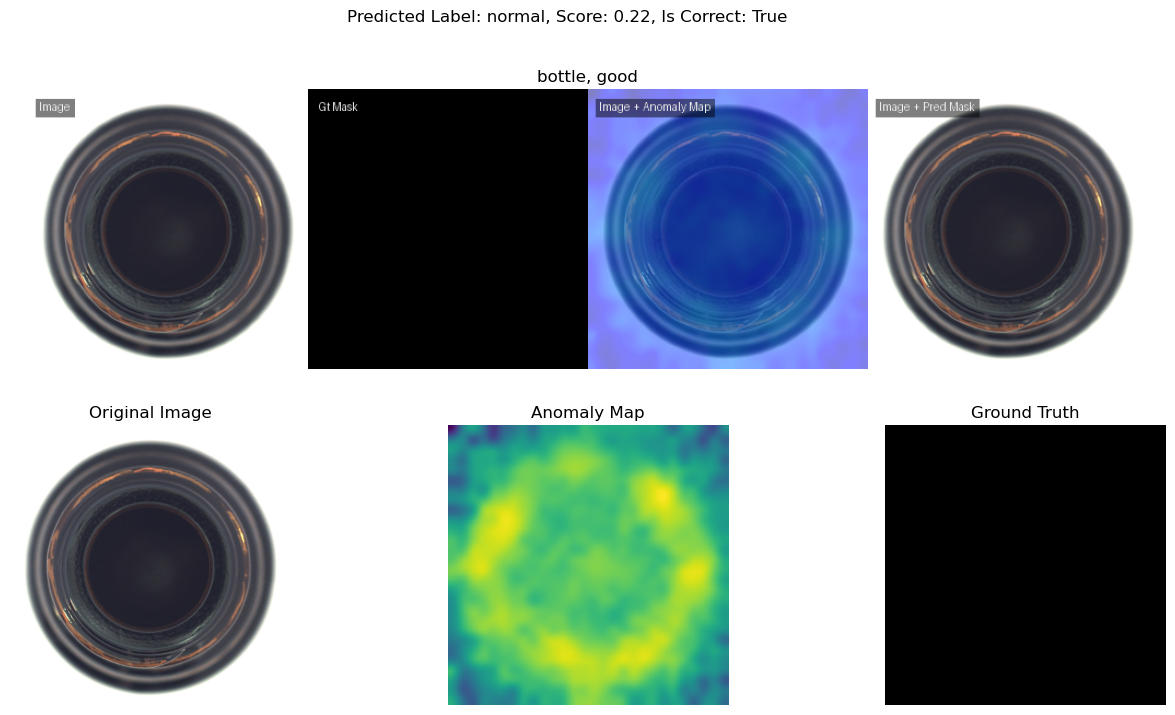

In [10]:
visualize_prediction(predictions[63])

Image Path: ['C:\\Users\\kocha\\Desktop\\Studies\\AI Workshop 1\\datasets\\MVTecAD\\bottle\\test\\broken_large\\000.png']
Anomaly Map Shape: torch.Size([1, 224, 224]), Min: 0.032653987407684326, Max: 0.8403326272964478
Predicted Label: tensor([True])
Predicted Score: tensor([0.9318])
Prediction Correct: True



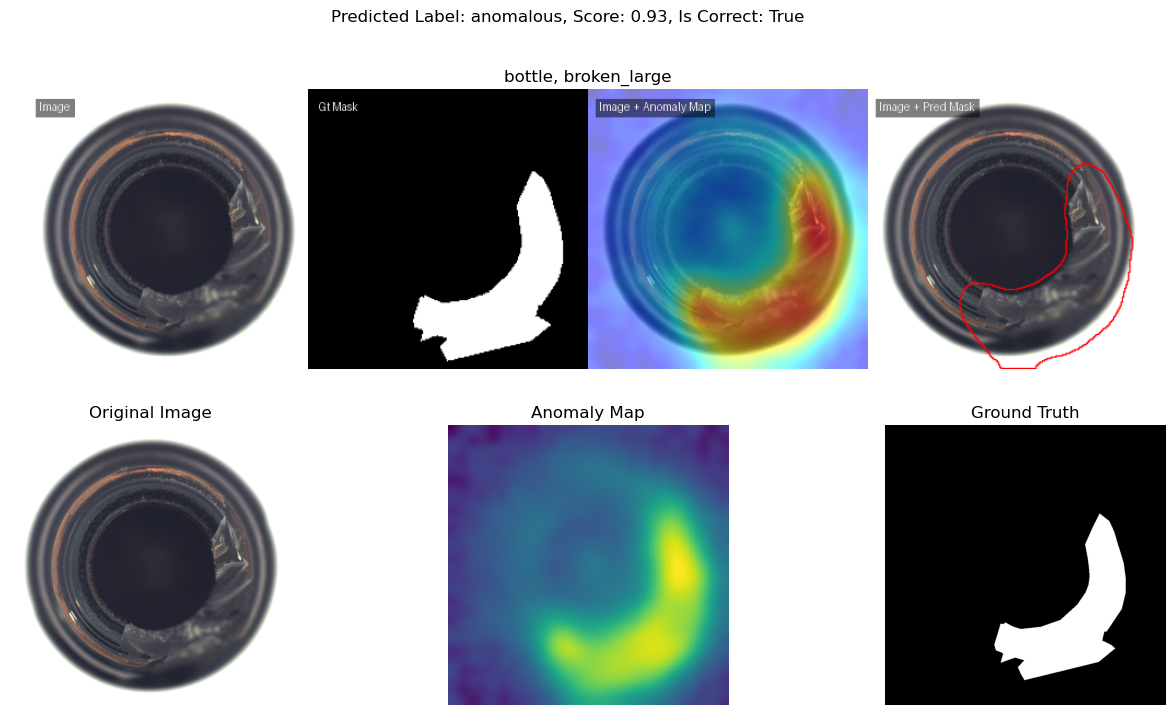

In [11]:
visualize_prediction(predictions[0])

## Also...

...I was trying to use the so called Growing Spheres algorithm to generate a first counterfactual explanation for an image. I cloned the repository with the implementation of the algorithm and tried to use it on several images to find a counterfactual explanation for each. Unfortunately, the algorithm seems to handle high dimensional data (like the images we have here) very slowly - I tried running it several times, on different images and with different parameters but it couldn't stop running, it was iterating endlessly. I'll see if I can do something about it.

# 03.04.2025

## Summary

In order to test the Growing Spheres algorithm (and other algorithms for generating counterfactual explanations) I wrote an auxiliary class (counterfactual_explanations_wrapper.py). It allows us to choose one category that we want to focus on, choose a specified image for which we want to generate a counterfactual explanation, and choose a specified algorithm for generating counterfactual explanations. Below is an example for hazelnut category in which we choose some hazelnut image and try to generate a counterfactual explanation for it using the Growing Spheres algorithm.

In [1]:
import sys
sys.path.insert(1, './src')

In [2]:
from src.counterfactual_explanations_wrapper import CounterfactualExplanationsWrapper

<frozen importlib.util>:207: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
c:\Users\kocha\anaconda3\envs\dmml\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:
from src.my_lib import summarize_predictions

In [4]:
cfew = CounterfactualExplanationsWrapper('hazelnut', 0)

INFO:anomalib.models.components.base.anomalib_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at C:\Users\kocha\Desktop\Studies\AI-Workshop-1\models\hazelnut\model.ckpt
c:\Users\kocha\anaconda3\envs\dmml\Lib\site-packages\lightning\pytorch\callbacks\model_check

Predicting: |          | 0/? [00:00<?, ?it/s]

In [5]:
summarize_predictions(cfew.predictions)

Summarizing predictions...
Number of predictions: 110
Number of normal predictions: 40
Number of anomalous predictions: 70
Number of correct predictions: 110
Accuracy: 100.00%
Normal Indexes: [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
Anomalous Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Correct Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,

In [44]:
# cfew.perform_algorithm(42, 'gs')

# This line of code tries to find a counterfactual explanation for prediction (image) with index 42 (non-anomalous)
# Not running this here because there would be too many debug messages and the output wouldn't be visible
# This code produces an example of counterfactual explanation, visible below

In [10]:
from PIL import Image

In [11]:
import numpy as np
import matplotlib.pyplot as plt

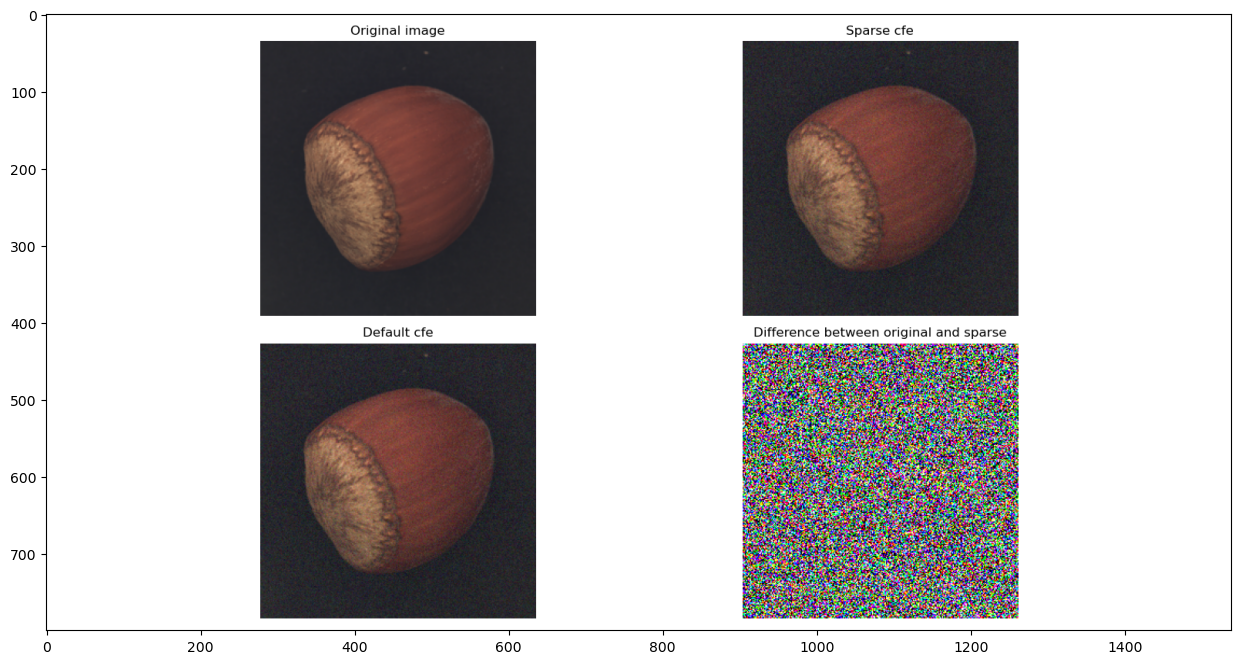

In [16]:
plt.figure(figsize=(16, 8))
plt.imshow(np.array(Image.open('./img/gs_cfe_hazelnut_for_no_anomaly.png')))

The output shows the original (non-anomalous) image and its counterfactual explanation (anomalous) found by the Growing Spheres algorithm. The algorithm runs pretty long. Tweaking its parameters may help increase the speed but that requires probably a lot of experimenting. Moreover, it's visible that the algorithm basically alters random pixels (making the image kind of a noisy version of the original one). This would mean that the algorithm may not be the best option for finding counterfactual explanations for anomalous images as there aren't probably that many chances that randomly altered pixels will produce a non-anomalous image (in this case, image of a non-anomalous hazelnut) in any reasonable execution time (I tried it but the algorithm was always running long and reaching the max iterations limit). There's a bigger chance though that the algorithm will produce an image labeled as anomalous. That's why as an example I decided to use a non-anomalous image which the algorithm was able to handle more quickly. It altered the image in such a way that the prediction for this image changed to anomalous and thus became the counterfactual explanation.

Another algorithm that I tested was the so called SEDC algorithm, or rather its modification, SEDC-T. Its approach is entirely different from that of the previous algorithm. Example output for this algorithnm (for the same non-anomalous image of hazelnut as before) is displayed below.

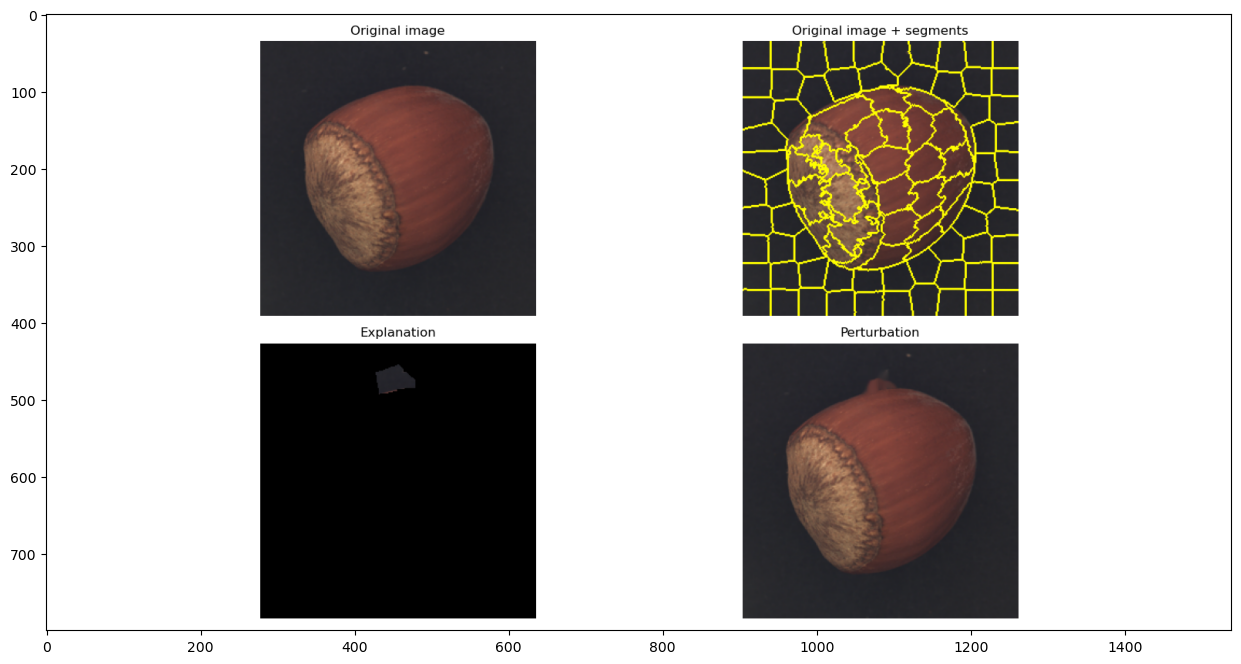

In [19]:
plt.figure(figsize=(16, 8))
plt.imshow(np.array(Image.open('./img/sedct_cfe_hazelnut_for_no_anomaly.png')))

The algorithm found a segment which after being removed resulted in the change of class from non-anomalous to anomalous. The removed pixels were substituted with one of the methods mentioned in the original article about the algorithm. What's important though, is that this algorithm seems to be more promising for finding counterfactual explanations for anomalous images as compared to the previous algorithm. Unfortunately, I tried running this algorithm on various anomalous hazelnut images but it couldn't generate anything, it always reached the max iterations limit. It seems that the methods of segmentation and of substituting removed pixels require a bit of experimenting/tweaking and then maybe it will work better and faster.

In [45]:
# cfew.perform_algorithm(100, 'sedct')

# Again, not running this here
# It was an attempt to find a counterfactual explanations for some anomalous image
# It resulted in reaching max iterations limit and no counterfactual explanation was found

In [43]:
del cfew

So, as of now, it seems that the algorithms can find counterfactual explanations for non-anomalous images. But if we need counterfactual explanations for anomalous images, I guess the next step could be to further investigate the two algorithms and experiment and see what can be done (e.g. parameter tweaking) so that they can find the desired counterfactual explanations for anomalous images (as fast as possible).

# 09.04.2024

## Summary

A new algorithm for generating counterfactual explanations has been implemented and tested. It's called FACE and it seems that it works but there's still probably some tweaks to do. Besides, as of now, this algorithm can generate counterfactual explanations only for anomalous images.

In [1]:
# cfew.perform_algorithm(21, 'face')

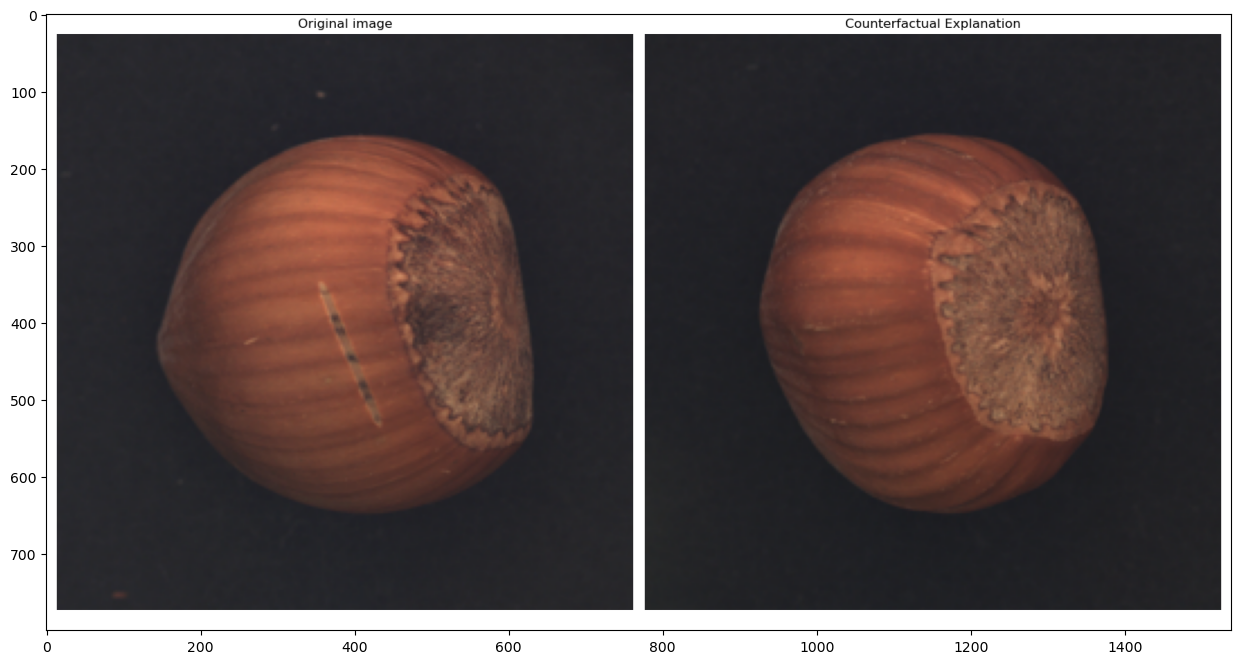

In [4]:
plt.figure(figsize=(16, 8))
plt.imshow(np.array(Image.open('./img/face_cfe_hazelnut_for_anomaly.png')))

So, we have three algorithms so far. All of them can be further investigated and tested but I think that SEDC-T seems to be the most promising one.

# Conclusions

Algorithms mentioned in previous sections have been tested and analyzed more closely. Below are conclusions about each of them. This section will be updated as more tests and analysis will be carried out.

## Growing Spheres

TODO

## SEDC-T

Advantages (+):
- generates both non-anomalous and anomalous CFE's
- generated CFE's can be pretty realistic
- different methods of segmenting images, possibility to choose the best method depending on the situation, segementation is accurate, one method allows you to do it by hand

Disadvantages (-):
- sometimes inpainting doesn't give satisfying results
- not many types anomalies can be generated

## FACE

TODO